# Final Project:
# Lead Prediction for On-line Training
## Luis Pardina - IT Academy - Oct 1st, 2022

### 1) Content of the data set

The data set contains leads collected by *X Education* which sells online courses to industry professionals. 

Lead is a concept applied in marketing & sales. A **lead** is information about a potential customer who may convert (became an actual customer) or not.

The information presented in the dataset is about the source of each lead, characteristics of the lead (such as time spent in the website or number of visits to its pages), and data about the characteristics of the potential customers collected when these people fill up a form providing info about their quest. 

It also shows if each lead has been converted into an actual customer or not. 39% of the total number of leads in the data set were converted. 

The Dataset is available in kaggle:
    
https://www.kaggle.com/code/turanmehdiyeva/lead-prediction/data 

The Dataset contains 9240 records with 37 variables. 

There are 6 continuous numerical variables, and 31 categorical variables (either nominal, ordinal or boolean).

### 2) Project objectives
    
- Make a model to predict whether a particular lead will be converted or not

- Although X Education gets a lot of leads, its lead conversion rate is low. We wish to find trends and patterns to identify the most potential leads, also known as ‘Hot Leads’ to help the sales team to focus the future marketing campaigns.

### 3) Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 4) Description of the content of the variables: 

- Prospect ID: A unique ID to identify the customer. 
- Lead Number: A lead number assigned to each lead procured. 
- Lead Origin: The origin identifier with which the potential customer was identified to be a lead. Includes API, Landing Page Submission, etc. 
- Lead Source: The source of the lead. Includes Google, Organic Search, Olark Chat, etc. 
- Do Not Email: An indicator variable selected by the potential customer wherein they select whether they want to be emailed about the course or not. 
- Do Not Call: An indicator variable selected by the potential customer wherein they select whether they want to be called about the course or not. 
- Converted: **The target variable**. Indicates whether a lead has been successfully converted or not. 
- Total Visits: The total number of visits made by the potential customer on the website. 
- Total Time Spent on Website: The total time spent by the customer on the website. 
- Page Views Per Visit: Average number of pages on the website viewed during the visits. 
- Last Activity: Last activity performed by the potential customer. Includes Email Opened, Olark Chat Conversation, etc. 
- Country: The country of the customer. 
- Specialization: The industry domain in which the potential customer worked before. Includes the level 'Select' which means the customer had not selected this option while filling the form. 
- How did you hear about X Education: The source from which the lead heard about X Education. 
- What is your current occupation: Indicates whether the customer is a student, unemployed or employed. 
- What matters most to you in choosing a course: An option selected by the potential customer indicating what is their main motto behind doing this course. this course 
- Search: Indicating whether the potential customer had seen the ad in any of the listed items. 
    - Magazine 
    - Newspaper Article 
    - X Education Forums 
    - Newspaper 
    - Digital Advertisement 
- Through Recommendations: Indicates whether the customer came in through recommendations. 
- Receive More Updates About Our Courses: Indicates whether the lead chose to receive more updates about the courses.  
- Tags: Tags assigned to customers indicating the current status of the lead. 
- Lead Quality: Indicates the quality of lead based on the data and intuition of the marketer / sales who has been assigned to the lead. 
- Update me on Supply Chain Content: Indicates whether the customer wants updates on the Supply Chain Content. 
- Get updates on DM Content: Indicates whether the customer wants updates on the DM Content.  
- Lead Profile : A lead level assigned to each customer based on their profile. 
- City: The city of the customer. 
- Asymmetrique Activity Index / Asymmetrique Profile Index / Asymmetrique Activity Score / Asymmetrique Profile Score: An index and score assigned to each customer based on their activity and their profile 
- I agree to pay the amount through cheque: Indicates whether the customer has agreed to pay the amount through cheque or not. 
- a free copy of Mastering The Interview: Indicates whether the customer wants a free copy of 'Mastering the Interview' or not. 
- Last Notable Activity: The last notable activity performed by the lead.  


### 5) Data Analysis and Cleaning

The dataset has 9240 records with 37 variables.

In [2]:
leads = pd.read_csv('leads.csv')

In [3]:
leads.head().T

,0,1,2,3,4
Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
Lead Number,660737,660728,660727,660719,660681
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Do Not Call,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0


In [4]:
leads.shape

(9240, 37)

There are **no duplicated rows**. The target variable is **balanced**.

In [5]:
leads.duplicated().sum()

0

In [6]:
leads['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

There are 6 continuous numerical variables, and 31 categorical variables. Many of the variables have **null values**, which will require some processing.

In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

*Prospect ID* and *Lead Number* are merely identifiers of the lead, I **remove** these two columns since they don't add value for the analysis.

In [8]:
leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [9]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

#### 5.1. Categorical variables

*Lead Origin* contains 5 possible origins of the lead:

In [10]:
leads['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

*Lead Source* holds the different sources of the leads. I join 'Google and 'google' into one single source. It has 36 nulls, I remove these 36 rows.

In [11]:
leads['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [12]:
leads.loc[leads['Lead Source'] == 'google','Lead Source'] = 'Google'

In [13]:
leads.drop(leads.loc[leads['Lead Source'].isnull()].index, axis = 0, inplace = True)

While *Do Not Email* has a vast majority of "No" but still 8% of "Yes", *Do not Call* is an useless variable.I remove it.

In [14]:
leads['Do Not Email'].value_counts(normalize=True)

No     0.921664
Yes    0.078336
Name: Do Not Email, dtype: float64

In [15]:
leads['Do Not Call'].value_counts(normalize=True)

No     0.999783
Yes    0.000217
Name: Do Not Call, dtype: float64

In [16]:
leads.drop('Do Not Call', axis=1, inplace=True)

*Last Activity* describes up to 17 kinds of last activity carried out by the potential customer. The variable contains some null values, I remove those rows.

In [17]:
leads['Last Activity'].value_counts(normalize=True)

Email Opened                    0.377019
SMS Sent                        0.299132
Olark Chat Conversation         0.106888
Page Visited on Website         0.070306
Converted to Lead               0.047017
Email Bounced                   0.035263
Email Link Clicked              0.029331
Form Submitted on Website       0.012743
Unreachable                     0.010216
Unsubscribed                    0.006481
Had a Phone Conversation        0.003296
Approached upfront              0.000989
View in browser link Clicked    0.000659
Email Received                  0.000220
Email Marked Spam               0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: Last Activity, dtype: float64

In [18]:
leads.drop(leads.loc[leads['Last Activity'].isnull()].index, axis = 0, inplace = True)

The information about the *Country* of the potential customer has low value, since 96% of the leads are from India and the rest is split among a miriad of countries. On top of that there are many nulls. So I decide to remove this column:

In [19]:
leads.Country.value_counts(normalize=True)

India                   0.957657
United States           0.010180
United Arab Emirates    0.007819
Singapore               0.003541
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [20]:
leads.drop('Country', axis=1, inplace=True)

The professional *Specialization* claimed by the potential customer shows an interesting information, but unfortunately it is not complete, there are many nulls. But I don't want to disregard the information and delete the column, so I follow a different approach: I just substitute the nulls (and the "Select") by the category "unknown".

In [21]:
leads['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [22]:
leads.Specialization.value_counts(normalize=True)

Select                               0.242922
Finance Management                   0.125636
Human Resource Management            0.109328
Marketing Management                 0.107502
Operations Management                0.065101
Business Administration              0.052446
IT Projects Management               0.047750
Supply Chain Management              0.045140
Banking, Investment And Insurance    0.043705
Travel and Tourism                   0.026354
Media and Advertising                0.026354
International Business               0.023222
Healthcare Management                0.020352
E-COMMERCE                           0.014481
Hospitality Management               0.014481
Retail Management                    0.013046
Rural and Agribusiness               0.009524
E-Business                           0.007436
Services Excellence                  0.005219
Name: Specialization, dtype: float64

In [23]:
leads.Specialization.replace({"Select": "unknown", np.nan: "unknown"}, inplace=True)

In [24]:
leads.Specialization.value_counts(normalize=True)

unknown                              0.362518
Finance Management                   0.105789
Human Resource Management            0.092058
Marketing Management                 0.090520
Operations Management                0.054817
Business Administration              0.044161
IT Projects Management               0.040207
Supply Chain Management              0.038009
Banking, Investment And Insurance    0.036801
Travel and Tourism                   0.022190
Media and Advertising                0.022190
International Business               0.019554
Healthcare Management                0.017137
E-COMMERCE                           0.012194
Hospitality Management               0.012194
Retail Management                    0.010985
Rural and Agribusiness               0.008019
E-Business                           0.006262
Services Excellence                  0.004394
Name: Specialization, dtype: float64

*How did you hear about X Education* has more than 7.000 null values and most of the non-null ones are 'Select' so this information is useless and I remove the column.

In [25]:
leads['How did you hear about X Education'].value_counts(normalize=True)

Select                   0.711717
Online Search            0.117169
Word Of Mouth            0.050319
Student of SomeSchool    0.044954
Other                    0.026972
Multiple Sources         0.022042
Advertisements           0.010151
Social Media             0.009571
Email                    0.003770
SMS                      0.003335
Name: How did you hear about X Education, dtype: float64

In [26]:
leads.drop('How did you hear about X Education', axis=1, inplace=True)

The *What is your current occupation* variable shows the current job of the potential customers which is an interesting information, but unfortunately it is not complete so I just substitute the nulls by the category "unknown".

In [27]:
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.856385
Working Professional    0.106502
Student                 0.032122
Other                   0.002339
Housewife               0.001403
Businessman             0.001247
Name: What is your current occupation, dtype: float64

In [28]:
leads['What is your current occupation'].replace({np.nan: "unknown"}, inplace=True)

In [29]:
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.603318
unknown                 0.295507
Working Professional    0.075030
Student                 0.022630
Other                   0.001648
Housewife               0.000989
Businessman             0.000879
Name: What is your current occupation, dtype: float64

The variables *'What matters most to you in choosing a course'* and *'Search' / 'Magazine' / 'Newspaper Article' / 'X Education Forums' / 'Newspaper' / 'Digital Advertisement' / 'Through Recommendations' / 'Receive More Updates About Our Courses'* are useless since they have one single value. So I remove them. 

In [30]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999687
Flexibility & Convenience    0.000156
Other                        0.000156
Name: What matters most to you in choosing a course, dtype: float64

In [31]:
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [32]:
leads['Search'].value_counts(normalize=True)

No     0.998462
Yes    0.001538
Name: Search, dtype: float64

In [33]:
leads['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [34]:
leads['Newspaper Article'].value_counts(normalize=True)

No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64

In [35]:
leads['X Education Forums'].value_counts(normalize=True)

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64

In [36]:
leads['Newspaper'].value_counts(normalize=True)

No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64

In [37]:
leads['Digital Advertisement'].value_counts(normalize=True)

No     0.999561
Yes    0.000439
Name: Digital Advertisement, dtype: float64

In [38]:
leads['Through Recommendations'].value_counts(normalize=True)

No     0.999231
Yes    0.000769
Name: Through Recommendations, dtype: float64

In [39]:
leads['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [40]:
leads.drop(['Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses'], axis=1, inplace=True)

The *'Tag'* variable shows useful info about the leads, but it is not complete so I just substitute the nulls by the category "unknown".

In [41]:
leads['Tags'].value_counts(normalize=True)

Will revert after reading the email                  0.351187
Ringing                                              0.206102
Interested in other courses                          0.088230
Already a student                                    0.080603
Closed by Horizzon                                   0.053909
switched off                                         0.041602
Busy                                                 0.032068
Lost to EINS                                         0.029815
Not doing further education                          0.025134
Interested  in full time MBA                         0.020107
Graduation in progress                               0.019241
invalid number                                       0.014387
Diploma holder (Not Eligible)                        0.010920
wrong number given                                   0.008147
opp hangup                                           0.005720
number not provided                                  0.004334
in touch

In [42]:
leads['Tags'].replace({np.nan: "unknown"}, inplace=True)

Same than previous variable for *'Lead Quality'*:

In [43]:
leads['Lead Quality'].value_counts(normalize=True)

Might be             0.348422
Not Sure             0.248285
High in Relevance    0.138546
Worst                0.137403
Low in Relevance     0.127343
Name: Lead Quality, dtype: float64

In [44]:
leads['Lead Quality'].replace({np.nan: "unknown"}, inplace=True)

The next two variables, *'Update me on Supply Chain Content'*  and *'Get updates on DM Content'* are also useless so I remove them:

In [45]:
leads['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [46]:
leads['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [47]:
leads.drop(['Update me on Supply Chain Content', 'Get updates on DM Content'], axis=1, inplace=True)

*'Lead Profile'* and *'City'* have a lot of null values, and also "Select" values, so I remove this two columns:

In [48]:
leads['Lead Profile'].value_counts(normalize=True)

Select                         0.635439
Potential Lead                 0.245230
Other Leads                    0.075383
Student of SomeSchool          0.037535
Lateral Student                0.003284
Dual Specialization Student    0.003128
Name: Lead Profile, dtype: float64

In [49]:
leads['City'].value_counts(normalize=True)

Mumbai                         0.414421
Select                         0.282312
Thane & Outskirts              0.097358
Other Cities                   0.088507
Other Cities of Maharashtra    0.058571
Other Metro Cities             0.049200
Tier II Cities                 0.009632
Name: City, dtype: float64

In [50]:
leads.drop(['Lead Profile', 'City'], axis=1, inplace=True)

Now I face four variables that are somehow linked, in two pairs numeric/categorical. The *'Asymmetrique Activity'* has an *'Index'* and a *'Score'*. The same happens with *'Asymmetrique Profile'*. Basically, the 'scores' are given to the leads based on their activity or their profile. These scores are then grouped in 3 bins (low / medium / high) and these are the 'indexes'.

These are valuable data, but again there are a lot of nulls.

So my strategy is to keep only the categorical variables (the 'indexes') and fill the nulls with the category 'unknown'.

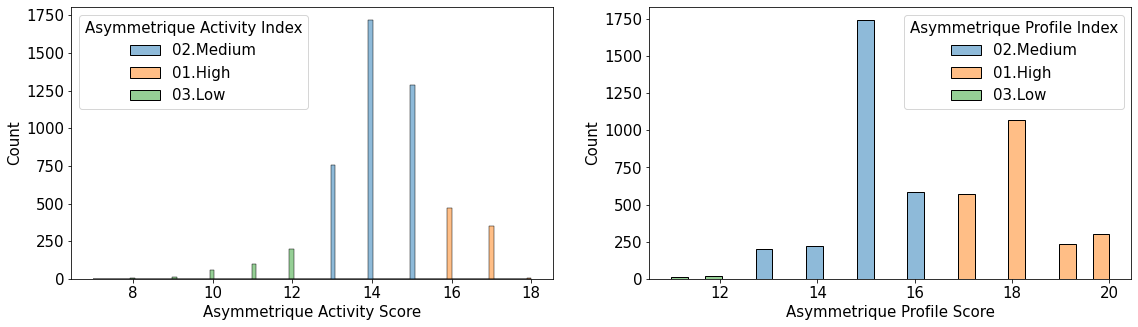

In [51]:
plt.rcParams.update({'font.size': 15, 'figure.figsize': (19,5)})
plt.subplot(1,2,1)
sns.histplot(x=leads['Asymmetrique Activity Score'], data=leads, hue=leads['Asymmetrique Activity Index'])
plt.subplot(1,2,2)
sns.histplot(x=leads['Asymmetrique Profile Score'], data=leads, hue=leads['Asymmetrique Profile Index']);

In [52]:
leads['Asymmetrique Activity Index'].value_counts(normalize=True)

02.Medium    0.76072
01.High      0.16606
03.Low       0.07322
Name: Asymmetrique Activity Index, dtype: float64

In [53]:
leads['Asymmetrique Activity Index'].replace({np.nan: "unknown"}, inplace=True)

In [54]:
leads['Asymmetrique Profile Index'].value_counts(normalize=True)

02.Medium    0.555421
01.High      0.438309
03.Low       0.006270
Name: Asymmetrique Profile Index, dtype: float64

In [55]:
leads['Asymmetrique Profile Index'].replace({np.nan: "unknown"}, inplace=True)

In [56]:
leads.drop('Asymmetrique Activity Score', axis=1, inplace=True) 
leads.drop('Asymmetrique Profile Score', axis=1, inplace=True)

It is not a surprise that the variable *'I agree to pay the amount through cheque'* contains 100% of 'No' :)
I remove it.

In [57]:
leads['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [58]:
leads.drop('I agree to pay the amount through cheque', axis=1, inplace=True)

The *'A free copy of Mastering The Interview'* contains how many leads wanted a free copy of that training material

In [59]:
leads['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.682742
Yes    0.317258
Name: A free copy of Mastering The Interview, dtype: float64

*Last Notable Activity* describes the last notable activity carried out by the potential customer:

In [60]:
leads['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.362078
Email Opened                    0.310118
SMS Sent                        0.236406
Page Visited on Website         0.034934
Olark Chat Conversation         0.020103
Email Link Clicked              0.019005
Email Bounced                   0.006591
Unsubscribed                    0.004943
Unreachable                     0.003515
Had a Phone Conversation        0.001538
Email Marked Spam               0.000220
Approached upfront              0.000110
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Form Submitted on Website       0.000110
Email Received                  0.000110
Name: Last Notable Activity, dtype: float64

#### 5.2 Numeric variables

I remain with 3 numeric variables + the target variable. The variable *'TotalVisits'* has a few nulls so I remove those rows.

In [61]:
leads.drop(leads.loc[(leads['TotalVisits'].isnull()|leads['Page Views Per Visit'].isnull())].index, axis = 0, inplace = True)

*TotalVisits* and *Page Views Per Visit* have the mean and the mode relatively close, while *Total Time Spent on Website* clearly is not a symmetrical variable.

Nevertheless, for all the variables the maximum is very far away from the mean and the mode. This indicates the data is skewed and the presence of outliers.

In [62]:
round(leads.describe(),1)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.0,9074.0,9074.0,9074.0
mean,0.4,3.5,482.9,2.4
std,0.5,4.9,545.3,2.2
min,0.0,0.0,0.0,0.0
25%,0.0,1.0,11.0,1.0
50%,0.0,3.0,246.0,2.0
75%,1.0,5.0,922.8,3.2
max,1.0,251.0,2272.0,55.0


After data cleaning we end up with 1 target variable, 3 numeric variables, 12 categorical variables and 9.074 records.

In [63]:
leads.shape

(9074, 16)

### 6) Features graphic representation

In [64]:
#Numeric variables
num_vars= list(leads.select_dtypes(include=['float64', 'int64']).columns)
num_vars.remove('Converted')
print(num_vars)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


None of the  numeric variables has a normal distribution, and *TotalVisits* and *PAge Views Per Visit* show outliers.

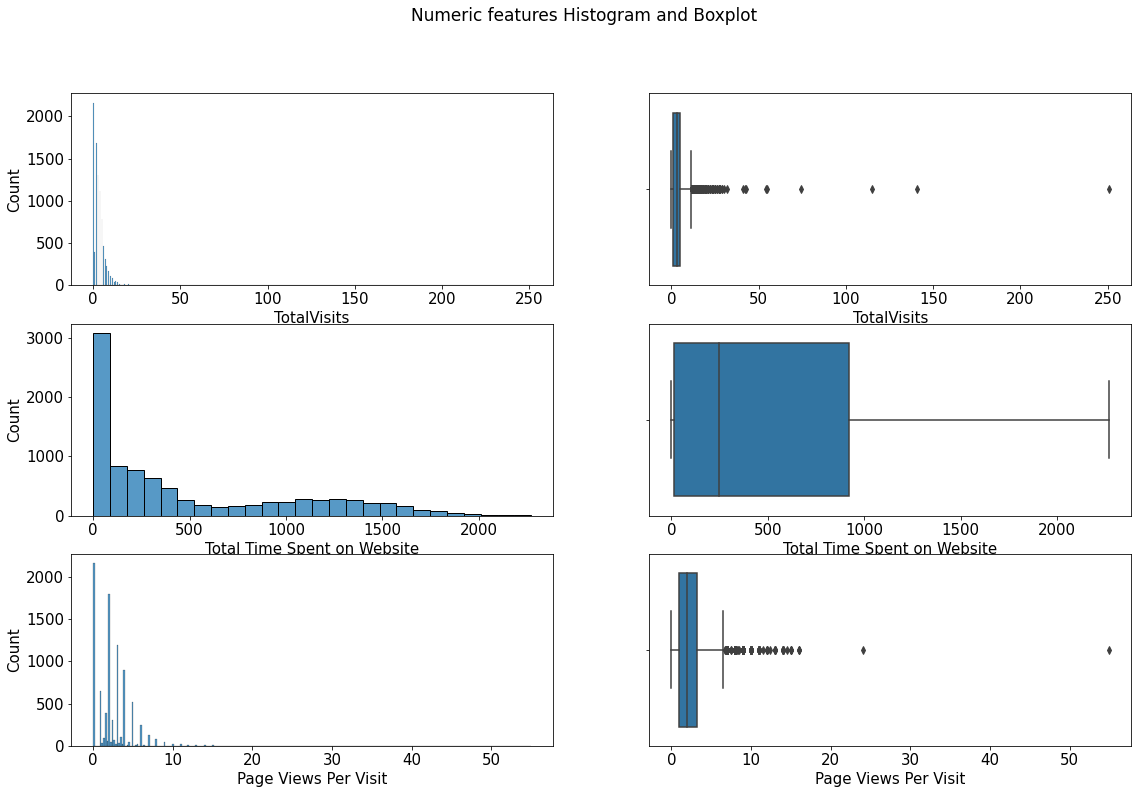

In [65]:
# Histogram and boxplot
f, axes = plt.subplots(3,2, figsize = (19,12))
f.suptitle('Numeric features Histogram and Boxplot', fontsize = 17)
for i, name in enumerate(num_vars):
    sns.histplot(x=leads[name], data=leads, ax = axes[i][0])
    sns.boxplot(x=leads[name], data=leads, ax = axes[i][1]);

In [66]:
#Categorical variables
cat_vars= list(leads.select_dtypes(object).columns)
print(cat_vars)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'A free copy of Mastering The Interview', 'Last Notable Activity']


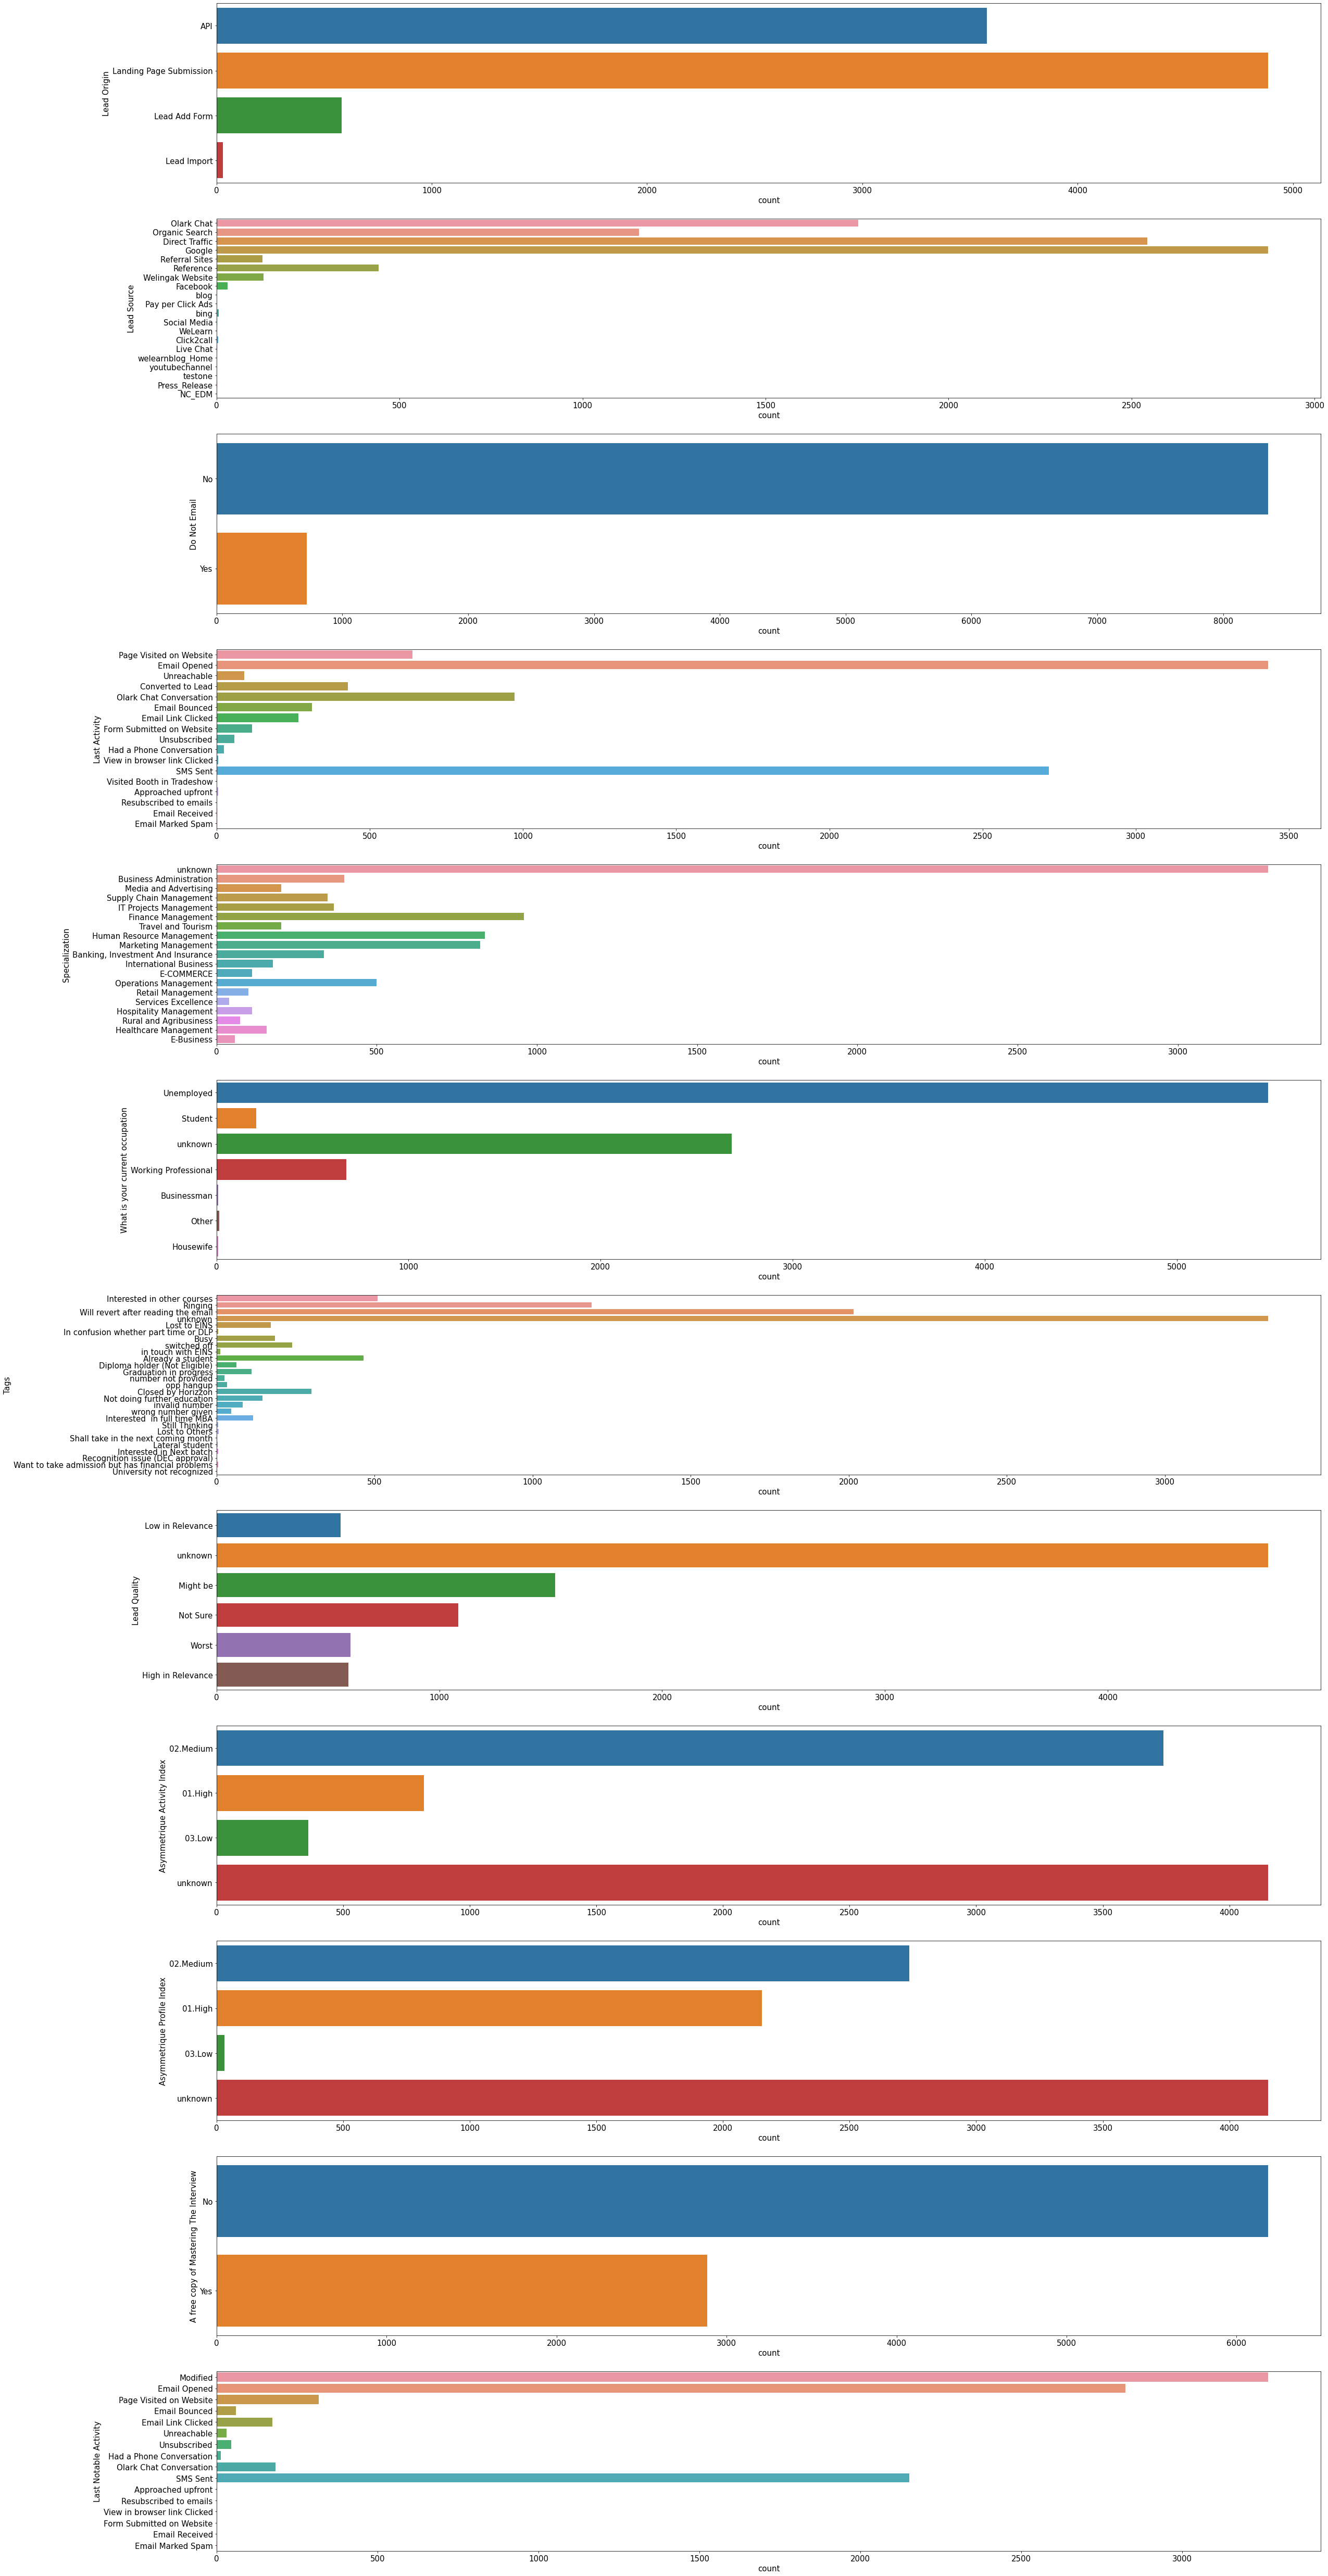

In [67]:
#Categorical variables distribution
f, axes = plt.subplots(12,1, figsize = (38, 90))
for i, ax in enumerate(axes.flatten()): 
    sns.countplot(y=leads[cat_vars].iloc[: , i], ax = ax); 

### 7) Trends and patterns in the categorical variables

To identify patterns in the leads I scan the different categories in each variable. selecting those that:

    - have a significant number of leads (greater than 500 leads out of 9.074).
    - have a significant degree of Converted leads (more that 50% when the average is 39%)

In [68]:
patterns = pd.DataFrame(columns=['Category', 'sum', 'count', 'mean'])
for i in cat_vars:
    groups=leads.groupby([i])['Converted'].agg(['sum','count', 'mean'])
    df= groups.rename_axis('Category').reset_index()
    df['Category']= i +'-'+ df['Category']
    df.drop(df.loc[(df['count']<500)|(df['mean']<0.50)].index, axis = 0, inplace = True)
    patterns = patterns.append(df)
patterns.rename(columns = {'sum': 'Converted', 'count': 'Total', 'mean':'%'}, inplace=True)
patterns.sort_values(['Total'], ascending=False)

,Category,Converted,Total,%
12,Last Activity-SMS Sent,1705,2716,0.627761
12,Last Notable Activity-SMS Sent,1489,2152,0.691914
19,Tags-Will revert after reading the email,1957,2016,0.970734
2,Lead Quality-Might be,1150,1519,0.757077
5,What is your current occupation-Working Profes...,622,677,0.918759
0,Lead Quality-High in Relevance,558,592,0.942568
2,Lead Origin-Lead Add Form,544,581,0.936317
1,Lead Quality-Low in Relevance,455,556,0.818345


There are 8 categories that indicate a high probability that the lead will be converted:

    - Lead Origin: **Lead Add Form**
    - Last Activity: **SMS Sent**
    - What is your current occupation: **Working professional**
    - Tags: **Will revert after reading the email**
    - Lead Quality: **High in relevance** / **Low in relevance** / **Might be**
    - Last Notable Activity: **SMS Sent**

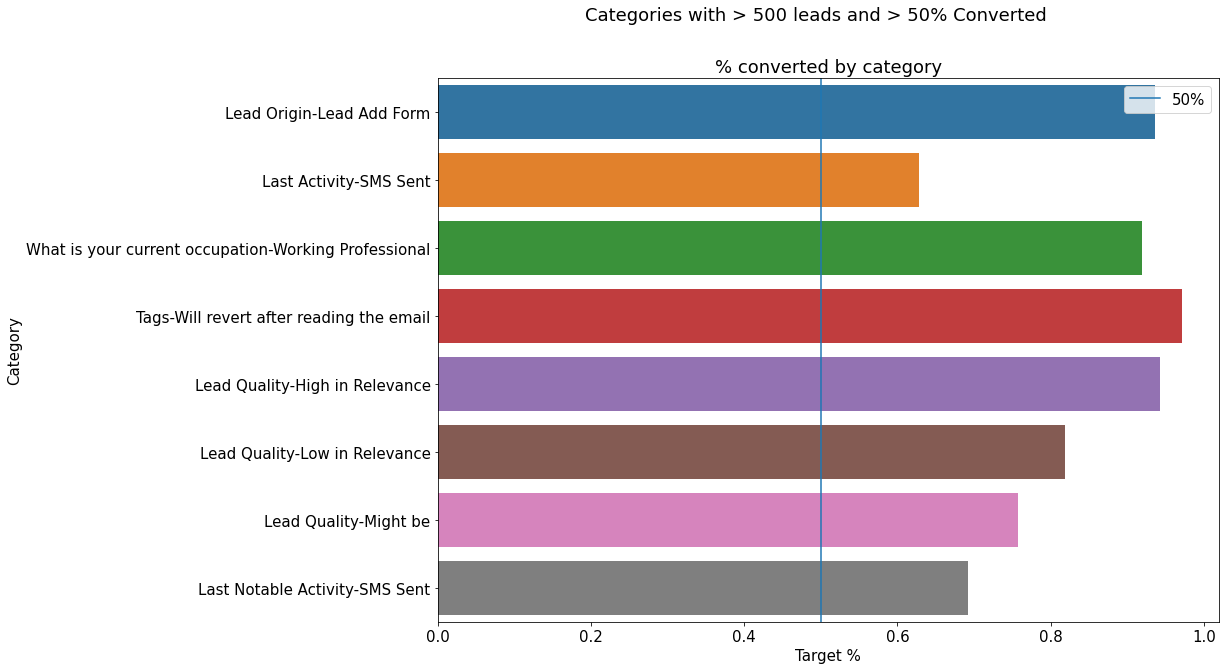

In [69]:
#Graphic of the % by category
plt.figure(figsize=(14,10))
sns.barplot(y=patterns['Category'], x=patterns['%'], data=patterns).set(title= '% converted by category');
plt.xlabel('Target %')

plt.axvline(x=0.5, label='50%')
plt.suptitle("Categories with > 500 leads and > 50% Converted")
plt.legend(loc = 'upper right');

### 8) Trends and patterns in the numeric variables

See in the heatmap that only *'Total Time Spent on Website'* has some correlation with the conversion. Graphically, I can observe that **when the total time spent is higher than 800** most of the leads get converted.

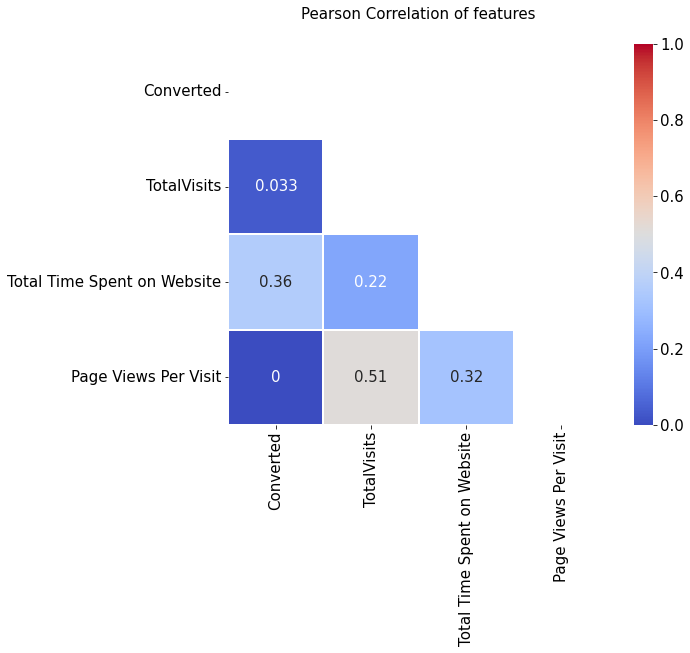

In [70]:
plt.figure(figsize=(9,7))
matrix = np.triu(leads.corr())
plt.title('Pearson Correlation of features', y=1.05, size = 15)
sns.heatmap(leads.corr().round(3), linewidths=0.1, vmax=1.0, square = True, cmap = 'coolwarm', 
           linecolor = 'white', annot = True, mask = matrix)
plt.show()

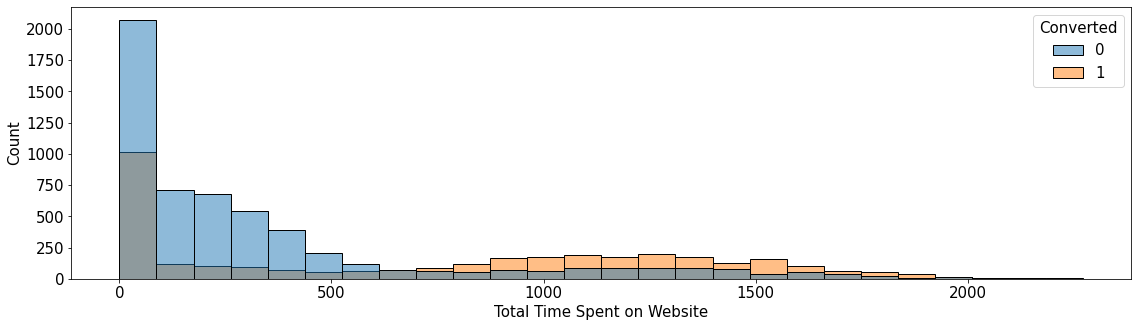

In [71]:
sns.histplot(data=leads, x="Total Time Spent on Website", hue = "Converted");

## 7) Building a prediction model

In [73]:
leads.head().T

,0,1,2,3,4
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0
Last Activity,Page Visited on Website,Email Opened,Email Opened,Unreachable,Converted to Lead
Specialization,unknown,unknown,Business Administration,Media and Advertising,unknown
What is your current occupation,Unemployed,Unemployed,Student,Unemployed,Unemployed


In [72]:

from scipy import stats
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, roc_auc_score
from imblearn.metrics import specificity_score
from sklearn.neural_network import MLPClassifier

### 7.1) Feature Engineering

First I convert into Boolean variables those categorical ones that have as unique values Yes/No.

In [74]:
leads['Do Not Email']= leads['Do Not Email'].map({'Yes':1,'No':0})
leads['A free copy of Mastering The Interview']= leads['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,unknown,Unemployed,Interested in other courses,Low in Relevance,02.Medium,02.Medium,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,unknown,Unemployed,Ringing,unknown,02.Medium,02.Medium,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,02.Medium,01.High,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,02.Medium,01.High,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,unknown,Unemployed,Will revert after reading the email,Might be,02.Medium,01.High,0,Modified


Then, due to the significant number of outliers and not being normal distibutions, I use Robust Scaler to scale the numerical variables:

In [75]:
print(num_vars)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [76]:
leads[num_vars]= RobustScaler().fit_transform(leads[num_vars])

And finally I dummify the rest of the categorical variables:

In [77]:
cat_vars= list(leads.select_dtypes(object).columns)
print(cat_vars)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Last Notable Activity']


In [78]:
leads = pd.get_dummies(leads, columns= cat_vars)

### 7.2) Train and Test subsets

Now I split into train and test subsets:

In [79]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,-0.75,-0.269811,-0.909091,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0.50,0.469427,0.227273,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,-0.25,1.410474,0.000000,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-0.50,0.064711,-0.454545,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,-0.25,1.296408,-0.454545,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [80]:
y= leads['Converted']
x= leads.drop(['Converted'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [81]:
X_train.shape

(6351, 129)

In [82]:
y_train.value_counts(normalize=True)

0    0.626201
1    0.373799
Name: Converted, dtype: float64

### 7.3) Model Selection and fine tuning

Now I am training different classifications models, and I am checking the results of the main metrics for each of them:

In [83]:
# Build, train and test models
mod = {} #models to test
mod['Logistic Regression'] = LogisticRegression(max_iter=500)
mod['Random Forest'] = RandomForestClassifier(random_state=42)
mod['Decision Tree'] = DecisionTreeClassifier(random_state=42)
mod['K-Nearest Neighbor'] = KNeighborsClassifier()
mod['AdaBoostClassifier'] = AdaBoostClassifier(random_state=42)
mod['GradientBoostingClassifier'] = GradientBoostingClassifier(random_state=42)
mod['Balanced Bagging Classifier'] = BalancedBaggingClassifier(base_estimator= RandomForestClassifier(), random_state=42)

accuracy, precision, recall, f1, roc = {}, {}, {}, {}, {}

for key in mod.keys():
    mod[key].fit(X_train, y_train)                         # Train
    pred = mod[key].predict(X_test)                        # Test
       
    accuracy[key] = accuracy_score(pred, y_test)           # Metrics
    precision[key] = precision_score(pred, y_test)
    recall[key] = recall_score(pred, y_test)
    f1[key] = f1_score(pred, y_test)
    roc[key] = roc_auc_score(pred, y_test)
    
metrics = pd.DataFrame(index=mod.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1', 'Roc_Auc'])    # DF with metrics
metrics['Accuracy'] = accuracy.values()
metrics['Precision'] = precision.values()
metrics['Recall'] = recall.values()
metrics['F1'] = f1.values()
metrics['Roc_Auc'] = roc.values()
round(metrics,3)


,Accuracy,Precision,Recall,F1,Roc_Auc
Logistic Regression,0.938,0.910,0.929,0.919,0.936
Random Forest,0.940,0.910,0.935,0.922,0.939
Decision Tree,0.924,0.903,0.903,0.903,0.920
K-Nearest Neighbor,0.903,0.846,0.899,0.872,0.902
AdaBoostClassifier,0.936,0.895,0.938,0.916,0.936
GradientBoostingClassifier,0.940,0.910,0.935,0.922,0.939
Balanced Bagging Classifier,0.940,0.925,0.922,0.923,0.937


Now I present the Confusion Matrix results for each one of the models:

In [84]:
TP, TN, FP, FN = {}, {}, {}, {}

for key in mod.keys():
    cm=confusion_matrix(y_test, mod[key].predict(X_test))    #Calculate
    TP[key]= cm[1][1]
    TN[key]= cm[0][0]
    FP[key]= cm[0][1]
    FN[key]= cm[1][0]

cm_list= pd.DataFrame(index=mod.keys())       #DF with confusion matrix results
cm_list['True Pos.']= TP.values()
cm_list['True Neg.']= TN.values()
cm_list['False P.']= FP.values()
cm_list['False N.']= FN.values()

cm_list

,True Pos.,True Neg.,False P.,False N.
Logistic Regression,965,1588,74,96
Random Forest,965,1595,67,96
Decision Tree,958,1559,103,103
K-Nearest Neighbor,898,1561,101,163
AdaBoostClassifier,950,1599,63,111
GradientBoostingClassifier,965,1595,67,96
Balanced Bagging Classifier,981,1579,83,80


First selection: the models that deliver better accuracy are *Ramdom Forest* and *Gradient Boosting Classifier*. Let's confirm that there is no overfitting with a **cross validation** using the accuracy as main metric:

In [85]:
#Random Forest Classifier cross validation
crossv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(mod['Random Forest'], x, y, scoring= 'accuracy', cv = crossv)
print('Accuracy: {0}     std_Accuracy: {1}'.format(np.mean(scores).round(4), np.std(scores).round(4)))

Accuracy: 0.9442     std_Accuracy: 0.0092


In [86]:
#Gradient Boosting Classifier cross validation
crossv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 0)
scores = cross_val_score(mod['GradientBoostingClassifier'], x, y, scoring= 'accuracy', cv = crossv)
print('Accuracy: {0}     std_Accuracy: {1}'.format(np.mean(scores).round(4), np.std(scores).round(4)))

Accuracy: 0.9424     std_Accuracy: 0.0101


Next step is to **fine tune the parameters** of both models:

In [87]:
#initial parameters Random Forest
mod['Random Forest'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [88]:
#parameter selection Random Forest
parameters ={'max_features': [10,15,20,25], 'n_estimators': [100, 150, 200, 250, 300], 'max_depth': [10, 15,20, 25]}

#set up Random Forest
rf_gs = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters, scoring = 'accuracy')

#train
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': [10, 15, 20, 25],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')

In [89]:
print ('Best Parameters: ', rf_gs.best_params_, ' \n')
print ('Best accuracy: ', rf_gs.best_score_, ' \n')

Best Parameters:  {'max_depth': 15, 'max_features': 15, 'n_estimators': 250}  

Best accuracy:  0.9466228464164246  



In [91]:
#initial parameters Gradient Boosting Classifier
mod['GradientBoostingClassifier'].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [92]:
#parameter selection Gradient Boosting Classifier
parameters ={'criterion': ['friedman_mse', 'squared_error'], 'n_estimators': [75, 100, 150, 200], 
             'learning_rate': [0.1, 0.5, 1.0], 'max_depth': [3, 5, 10]}

#set up Gradient Boosting Classifier
gbc_gs = GridSearchCV(estimator = GradientBoostingClassifier(random_state=42), param_grid = parameters, scoring = 'accuracy')

#train Gradient Boosting Classifier
gbc_gs.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [75, 100, 150, 200]},
             scoring='accuracy')

In [93]:
print ('Best Parameters: ', gbc_gs.best_params_, ' \n')
print ('Best accuracy: ', gbc_gs.best_score_, ' \n')

Best Parameters:  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}  

Best accuracy:  0.9469381787544062  



Now I present the results of both models with the original parameters and the parameters adjusted:

In [99]:
rf= RandomForestClassifier(max_depth=15, max_features=15, n_estimators =250, random_state=42)
rf.fit(X_train, y_train)

#Calculate metrics
accuracy = accuracy_score(rf.predict(X_test), y_test)
precision = precision_score(rf.predict(X_test), y_test)
recall = recall_score(rf.predict(X_test), y_test)
f1 = f1_score(rf.predict(X_test), y_test)
roc = roc_auc_score(rf.predict(X_test), y_test)
metrics.loc['Random Forest Optimized'] = [accuracy, precision, recall, f1, roc]

#Calculate confusion matrix
cm=confusion_matrix(y_test, rf.predict(X_test)) 
cm_list.loc['Random Forest Optimized'] = [cm[1][1], cm[0][0], cm[0][1], cm[1][0]]

In [95]:
gbc= GradientBoostingClassifier(random_state=42, criterion ='friedman_mse', max_depth=3, learning_rate=0.1, n_estimators =150)
gbc.fit(X_train, y_train)

#Calculate metrics
accuracy = accuracy_score(gbc.predict(X_test), y_test)
precision = precision_score(gbc.predict(X_test), y_test)
recall = recall_score(gbc.predict(X_test), y_test)
f1 = f1_score(gbc.predict(X_test), y_test)
roc = roc_auc_score(gbc.predict(X_test), y_test)
metrics.loc['GradientBoostingClassifier Optimized'] = [accuracy, precision, recall, f1, roc]

#Calculate confusion matrix
cm=confusion_matrix(y_test, gbc.predict(X_test)) 
cm_list.loc['GradientBoostingClassifier Optimized'] = [cm[1][1], cm[0][0], cm[0][1], cm[1][0]]

In [104]:
round(metrics.iloc[[1,5,7,8]],4)

,Accuracy,Precision,Recall,F1,Roc_Auc
Random Forest,0.9401,0.9095,0.9351,0.9221,0.9392
GradientBoostingClassifier,0.9401,0.9095,0.9351,0.9221,0.9392
Random Forest Optimized,0.9431,0.9057,0.9459,0.9254,0.9436
GradientBoostingClassifier Optimized,0.9412,0.9105,0.9370,0.9235,0.9404


In [105]:
cm_list.iloc[[1,5,7,8]]

,True Pos.,True Neg.,False P.,False N.
Random Forest,965,1595,67,96
GradientBoostingClassifier,965,1595,67,96
Random Forest Optimized,961,1607,55,100
GradientBoostingClassifier Optimized,966,1597,65,95


In [103]:
#Cross Validation final model
final_model= RandomForestClassifier(max_depth=15, max_features=15, n_estimators =250, random_state=42)
crossv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
scores = cross_val_score(final_model, x, y, scoring= 'accuracy', cv = crossv)
print('Accuracy: {0}     std_Accuracy: {1}'.format(np.mean(scores).round(4), np.std(scores).round(4)))

Accuracy: 0.946     std_Accuracy: 0.0081


### Finally, this is the model selected:

**RandomForestClassifier(max_depth=15, max_features=15, n_estimators =250, random_state=42)**

**Accuracy: 0.9431**
